In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=5, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)

channels = [
    "2mu2e",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


In [3]:
out[samples[0]]["cutflow"][channels[0]].print_table()
print()
out[samples[0]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[0]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                22.3         22.3
PV filter                    59.8         22.3
>=2 LJs                      11.8          5.0
2mu2e                        11.8          5.0

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              26364.0      26364.0
pass triggers              8184.0       8184.0
PV filter                 21957.0       8184.0
>=2 LJs                    4347.0       1825.0
2mu2e                      4334.0       1821.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            37.3          37.3            37.3
PV filter               100.0         100.0            37.3
>=2 LJs                  19.8          2

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb5be658610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

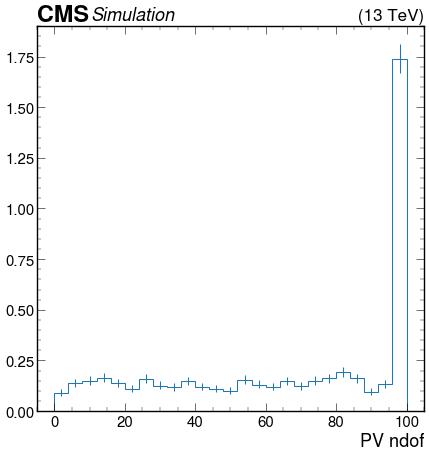

In [4]:
utilities.plot(out[samples[0]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb5e8ebefa0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb5bfe9e520>, text=[])

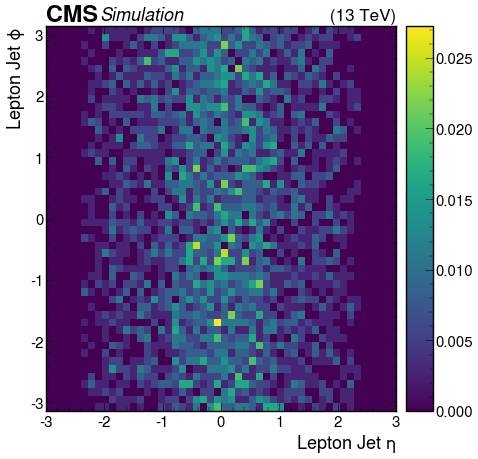

In [5]:
utilities.plot(out[samples[0]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb5dd2c5370>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

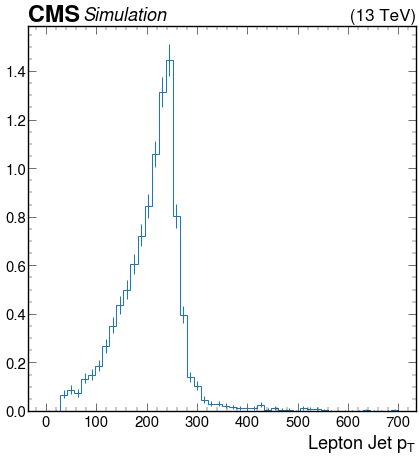

In [6]:
utilities.plot(out[samples[0]]["hists"]["lj_pt"][channels[0], ::2j])

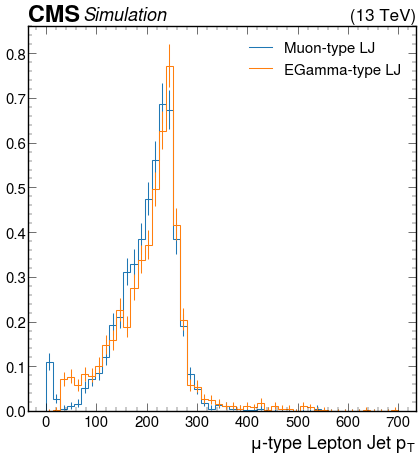

In [7]:
utilities.plot([
    out[samples[0]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])